In [0]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My\ Drive/books

In [0]:
!pip install tashaphyne
!pip install pyarabic

In [0]:
from preText import Text_clean,saveFile
import os
import numpy as np
import matplotlib.pyplot as plt


In [0]:
finaldatadir='dialect26/'


DilList = ['BEI_all.txt','CAI_all.txt','DOH_all.txt','MSA_all.txt','RAB_all.txt','TUN_all.txt'] # 6 dialect

x_=[]
y_=[]
for f in os.listdir(finaldatadir):
  if f in DilList:
    D = os.path.join(finaldatadir + '/' , f)
    with open(D ,'r') as txtfile:
      for line in txtfile.readlines():
        x_.append(Text_clean.CleanThewordsList(line.split(' ')))
        y_.append(f.split('_')[0])

  

In [13]:
x_[0],y_[0]

(['صار', 'هونيك', 'بالظبط', 'قدام', 'مكتب', 'استعلامات', 'السياح'], 'BEI')

In [0]:
seq_len = [len(x) for x in x_]
seq_len = max(seq_len)

In [15]:
len(x_),len(y_)

(9600, 9600)

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_)

In [0]:
sequences = tokenizer.texts_to_sequences(x_)
sequences = pad_sequences(sequences, maxlen=seq_len)

In [44]:
vocabulary_size = len(tokenizer.word_counts)
vocabulary_size

12535

In [45]:
set(y_)

{'BEI', 'CAI', 'DOH', 'MSA', 'RAB', 'TUN'}

In [0]:
X = np.array(sequences)

In [0]:
didict = {'BEI':0, 'CAI':1, 'DOH':2, 'MSA':3, 'RAB':4, 'TUN':5}

In [0]:
Y = np.zeros((len(y_),6))
for i,e in enumerate(y_):
  idx = didict[e]
  Y[i,idx] = 1


#Model


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding,Dropout,SpatialDropout1D

In [0]:
def create_model(vocabulary_size, seq_len,output_size):
    model = Sequential()
    model.add(Embedding(vocabulary_size, output_dim = 100, input_length = seq_len))
    model.add(SpatialDropout1D(0.2))
    model.add(LSTM(128,dropout=0.2, recurrent_dropout=0.2))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(output_size, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
   
    model.summary()
    
    return model

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
             X, Y, test_size=0.1,shuffle=True)

In [52]:
model=create_model(vocabulary_size+1,seq_len,6)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 37, 100)           1253600   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 37, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                

In [53]:
hist=model.fit(X_train, y_train, batch_size=25, epochs=20,verbose=1,validation_data=[X_test,y_test])

Train on 8640 samples, validate on 960 samples
Epoch 1/20
8640/8640 [==============================] - 40s 5ms/sample - loss: 1.4829 - acc: 0.3862 - val_loss: 0.7949 - val_acc: 0.7365
Epoch 2/20
8640/8640 [==============================] - 39s 4ms/sample - loss: 0.6545 - acc: 0.7765 - val_loss: 0.5777 - val_acc: 0.7854
Epoch 3/20
8640/8640 [==============================] - 38s 4ms/sample - loss: 0.3740 - acc: 0.8817 - val_loss: 0.5736 - val_acc: 0.7990
Epoch 4/20
8640/8640 [==============================] - 39s 4ms/sample - loss: 0.2629 - acc: 0.9177 - val_loss: 0.6310 - val_acc: 0.7896
Epoch 5/20
8640/8640 [==============================] - 38s 4ms/sample - loss: 0.2013 - acc: 0.9377 - val_loss: 0.6385 - val_acc: 0.7948
Epoch 6/20
8640/8640 [==============================] - 38s 4ms/sample - loss: 0.1720 - acc: 0.9479 - val_loss: 0.7386 - val_acc: 0.7875
Epoch 7/20
8640/8640 [==============================] - 38s 4ms/sample - loss: 0.1642 - acc: 0.9494 - val_loss: 0.7367 - val_acc: 0

KeyboardInterrupt: ignored

In [0]:
allpre=model.predict(X_test)


In [0]:
preclass = []
yclass = []
for i in allpre:
  preclass.append(np.argmax(i))
for i in y_test:
  yclass.append(np.argmax(i))



In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [58]:
print(classification_report(yclass,preclass))

              precision    recall  f1-score   support

           0       0.84      0.77      0.81       175
           1       0.66      0.75      0.71       161
           2       0.68      0.76      0.72       167
           3       0.87      0.84      0.86       154
           4       0.80      0.83      0.82       157
           5       0.94      0.77      0.85       146

    accuracy                           0.79       960
   macro avg       0.80      0.79      0.79       960
weighted avg       0.80      0.79      0.79       960



[[135  16  18   1   4   1]
 [ 11 121  16   5   6   2]
 [  7  17 127   8   7   1]
 [  2   7  11 130   3   1]
 [  3  11   7   4 130   2]
 [  2  10   7   2  12 113]]
Accuracy: 78.75%


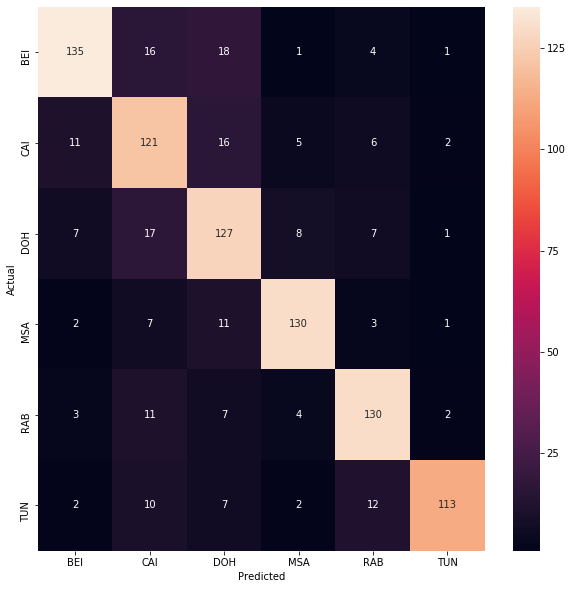

In [62]:
import seaborn as sns

matrix = confusion_matrix(yclass,preclass)
print(matrix)


scores= model.evaluate(X_test, y_test,verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


conf_mat = confusion_matrix(yclass,preclass)


#row,col = np.diag_indices(conf_mat.shape[0])
#conf_mat[row,col]=0


fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=didict, yticklabels=didict)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()